			Welcome to Twitter Sentiment Analyzer

What are you analyzing today?



Note: A subject refers to an account or query

                            1) Analyze single subject (can even apply a query)

                            2) Analyze Multiple(two) sujbects rather


                            Select(1 OR 2) : 1

@AccountID or a Topic
                            Like  @name_lastname | OR | #COVID19 
                                  @NameLastname  |    | Artificial Intelligence 

                            Input to search for : @realpalash4

Do you wish to insert query? (Y/N)n
max_dict_key d99
End : 1402909158949588994


Positive tweets percentage in @realpalash4 account: 38.000 %

Negative tweets percentage in @realpalash4 account: 9.000 %

Neutral tweets percentage in @realpalash4 account: 53.000 %


POSITIVE TWEETS FROM @realpalash4's account: 


No matter how beautiful you are, just remember monkeys in a zoo also attract crowds:
BE HUMBLE
No matter how fair you are, you will

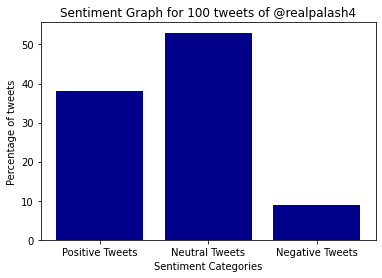

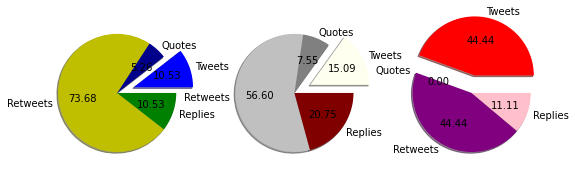

In [1]:
import re 
import tweepy
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from textblob import TextBlob 

class TwitterClient: 
    ''' 
    Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        consumer_key = 'A4izNtx5ERZfIgGpR82TDP31O'
        consumer_secret = 'nJLK1cWbgmBa4oTRTH76CbReoQ5AvRWl3IdmVLJhiUmEZFMh5E'
        access_token = '1339447711909625859-qw2uyJ4jVHTXovsibqDoGbdifLjv8E'
        access_token_secret = 'WnM2bIZZ84QCpYSrR3V9pIdYTp2DKGck8ZJ7ogmT9DnRQ'

    # attempt authentication from twitter API
        try:  
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            self.auth.set_access_token(access_token, access_token_secret) 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def initiate(self):
        print('\t\t\tWelcome to Twitter Sentiment Analyzer\n')
        print('What are you analyzing today?\n')
        print()
        choice = 0
        while(choice not in [1,2]):
            choice = int(input('''\nNote: A subject refers to an account or query\n
                            1) Analyze single subject (can even apply a query)\n
                            2) Analyze Multiple(two) sujbects rather\n

                            Select(1 OR 2) : '''))

            if choice == 1:
                ID1 = input('''\n@AccountID or a Topic
                            Like  @name_lastname | OR | #COVID19 
                                  @NameLastname  |    | Artificial Intelligence 

                            Input to search for : ''')
                print()            
                dec = input('Do you wish to insert query? (Y/N)')

                if dec.lower() == 'y':    
                    query = input('''--Proper query(with or w/o hashtag) will have better result--
                                     --Proper hashtag will help better search--

                                     Give your query : ''')
                    flag = 1
                    return (ID1, query, flag)

                else:
                    flag = 0
                    return (ID1, flag)

            else:
                print('---Comparing two accounts\topics having something in common will be great to analyze!---\n')
                ID1 = input('''\nEnter @AccountID or a Topic\Query :
                            Like  @name_lastname  OR  #COVID19 
                                  @NameLastname       Artificial Intelligence 

                            First input : ''')

                ID2, query = input('\nAnother @AccountID\Topic and a(blankspace between) subject\situation :').split() 

                flag = 2  
                return (ID1, ID2, query, flag)
                
    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        analysis = TextBlob(self.clean_tweet(tweet)) 

        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, ID, count = 100, query='', max_id = None): 
        tweets = []
        parsed_tweet = {}
        cnt = 0

        try:
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.user_timeline(id = ID, q = query, count = count, tweet_mode = 'extended', max_id = max_id)
            for tweet in fetched_tweets:
                dict_lst = []
                key = '{}'.format('d' + str(cnt))
                
                sentiment = self.get_tweet_sentiment(tweet.full_text)
                dict_lst.append(sentiment)
                
                if tweet.retweeted or tweet.full_text.startswith('RT @'):
                    text = tweet.retweeted_status.full_text
                    dict_lst.append(text)
                    
                elif tweet.in_reply_to_status_id is not None:
                    try: #text_of_reply is the reply tweet of another user before our AccID replied to them
                        text_of_reply = self.api.get_status(tweet.in_reply_to_status_id, tweet_mode='extended').full_text
                        sentiment_of_reply = self.get_tweet_sentiment(text_of_reply)
                        dict_lst.append(sentiment_of_reply)
                        dict_lst.append(tweet.full_text)
                        dict_lst.append(text_of_reply)
                    except:
                        dict_lst.append('No reply status found') 
                        dict_lst.append(tweet.full_text)
                        dict_lst.append('No reply status found') 
                                    
                else:
                    text = tweet.full_text                   
                    dict_lst.append(text)

                if tweet.retweeted or tweet.full_text.startswith('RT @'):
                    tweet_type = 'retweet'
                elif tweet.is_quote_status:    
                    tweet_type = 'quote'
                elif tweet.in_reply_to_status_id is not None:
                    tweet_type = 'reply'
                else:
                    tweet_type = 'tweet'

                dict_lst.append(tweet_type)    
                
                if not dict_lst[1].startswith('No'):
                    if dict_lst[0] == dict_lst[1]:
                        del dict_lst[1]
                    elif dict_lst[0] == 'positive' and dict_lst[1] == 'negative':
                        del dict_lst[1]
                    elif dict_lst[0] == 'negative' and dict_lst[1] == 'positive':
                        dict_lst[0] = 'negative'
                        del dict_lst[1]
                    elif dict_lst[0] == 'neutral' and dict_lst[1] == 'negative':
                        dict_lst[0] == 'positive'
                        del dict_lst[1] 
                    elif dict_lst[0] == 'neutral' and dict_lst[1] == 'positive':
                        dict_lst[0] == 'neutral'
                        del dict_lst[1] 
                    elif dict_lst[0] == 'negative' and dict_lst[1] == 'neutral':
                        dict_lst[0] == 'negative'
                        del dict_lst[1] 
                    elif dict_lst[0] == 'positive' and dict_lst[1] == 'neutral':
                        dict_lst[0] == 'positive'
                        del dict_lst[1]
                
                dict_lst.append(tweet.id)
                parsed_tweet[key] = dict_lst
                cnt += 1

            max_dict_key = max(parsed_tweet)
            print('max_dict_key', max_dict_key)
            end = parsed_tweet[max_dict_key][-1]
            print('End :', end)
            
            return parsed_tweet, end

        except tweepy.TweepError as e: 
            print("Error : " + str(e))

    def plotPie(a,b,c,d,e,f,g,h,i,j,k,l):
        fig, (pi1, pi2, pi3) = plt.subplots(1, 3, figsize=(9, 9))
        #fig.suptitle('Distribution of tweet types')
        pos_pie_data = [a, b, c, d]
        pie_label = ['Tweets', 'Quotes', 'Retweets', 'Replies']        
        pos_pie_color = ['b', 'darkblue', 'y', 'g']
        pi1.pie(pos_pie_data, labels=pie_label, colors=pos_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi1.title('Composition of positive tweets')

        net_pie_data = [e, f, g, h]
        net_pie_color = ['ivory', 'grey', 'silver', 'maroon']
        pi2.pie(net_pie_data, labels=pie_label, colors=net_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi2.title('Composition of neutral tweets')
        
        neg_pie_data = [i, j, k, l]
        neg_pie_color = ['r', 'magenta', 'purple', 'pink']
        pi3.pie(neg_pie_data, labels=pie_label, colors=neg_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi3.title('Composition of negative tweets')

        plt.show()        
        

        
def main(): 
    obj = TwitterClient()
    inputs = obj.initiate()    
    
    if inputs[-1] == 0:
        tweets1 = []
        temp1, end = obj.get_tweets(ID = inputs[0], count = 100)
#         print('temp1', temp1)
#         print('end:', end)
        print()
        for key in temp1:
            tweets1.append(temp1[key])
        
        #print('updated tweets1', tweets1)
            
    elif inputs[-1] == 1:
        tweets1 = []
        temp1,end = obj.get_tweets(ID = inputs[0], count = 100)
#         print('temp1', temp1)
        print('end:', end)
        print()
        for key in temp1:
            tweets1.append(temp1[key])

#         print('updated tweets1', tweets1)
        
        tweets2 = []
        temp2,end = obj.get_tweets(ID = inputs[0], count = 50, query = 'from:{} filter:{}'.format(inputs[0] ,inputs[1]))
        print()
#         print('temp2', temp2)
        print('end:', end)
        print()
        for key in temp2:
            tweets2.append(temp2[key])

        #print('updated tweets2', tweets2)
        
    else:
        tweets1 = []
        temp1,end = obj.get_tweets(ID = inputs[0], count = 100)
        print('end:', end)
        print()
        for key in temp1:
            tweets1.append(temp1[key])

        #print('updated tweets1', tweets1)
        
        tweets2 = []
        temp2,end = obj.get_tweets(ID = inputs[1], count = 100)
        print()
        print('end:', end)
        print() 
        for key in temp2:
            tweets2.append(temp2[key])

        #print('updated tweets2', tweets2)
        
    if inputs[-1] == 0:
        ptweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'positive']
        ntweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'negative']
        
        print("\nPositive tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ptweets1)/len(temp1))) 
        print("\nNegative tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ntweets1)/len(temp1))) 
        print("\nNeutral tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*(len(tweets1) - (len(ntweets1)+len( ptweets1 )))/len(temp1))) 

    elif inputs[-1] == 1:
        ptweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'positive']
        ntweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'negative'] 

        print("\nPositive tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ptweets1)/len(temp1))) 
        print("\nNegative tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ntweets1)/len(temp1))) 
        print("\nNeutral tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*(len(tweets1) - (len(ntweets1)+len( ptweets1 )))/len(temp1))) 
                
        ptweets2 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets2 if item[0] == 'positive']
        ntweets2 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets2 if item[0] == 'negative']

    elif inputs[-1] == 2:
        ptweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'positive']
        ntweets1 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets1 if item[0] == 'negative']

        print("\nPositive tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ptweets1)/len(temp1))) 
        print("\nNegative tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*len(ntweets1)/len(temp1))) 
        print("\nNeutral tweets percentage in {} account: {:.3f} %".format(inputs[0], 100*(len(tweets1) - (len(ntweets1)+len(ptweets1)))/len(temp1))) 

        ptweets2 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets2 if item[0] == 'positive']
        ntweets2 = [item[2] if item[1].startswith('No reply status') else item[1] for item in tweets2 if item[0] == 'negative']

        print("\nPositive tweets percentage in {} account: {:.3f} %".format(inputs[1], 100*len(ptweets2)/len(temp2))) 
        print("\nNegative tweets percentage in {} account: {:.3f} %".format(inputs[1], 100*len(ntweets2)/len(temp2))) 
        print("\nNeutral tweets percentage in {} account: {:.3f} %".format(inputs[1], 100*(len(tweets2) - (len(ntweets2)+len(ptweets2)))/len(temp2))) 
        
    if inputs[-1] == 0:
        print("\n\nPOSITIVE TWEETS FROM {}'s account: ".format(inputs[0])) 
        print()
        print()
        for tweet in ptweets1: 
            print(tweet) 

        print("\n\nNEGATIVE TWEETS FROM {}'s account: ".format(inputs[0]))
        print()
        print()
        for tweet in ntweets1: 
            print(tweet) 
    
    elif inputs[-1] == 1:
        print("\n\nPOSITIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[0], inputs[1]))
        print()
        print()
        for tweet in ptweets1:
            print(tweet) 

        print("\n\nNEGATIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[0], inputs[1]))
        print()
        print()
        for tweet in ntweets1:
            print(tweet) 
    
    elif inputs[-1] == 2:
        print("\n\nPOSITIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[0], inputs[2]))
        print()
        print()
        for tweet in ptweets1: 
            print(tweet) 

        print("\n\nNEGATIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[0], inputs[2]))
        print()
        print()
        for tweet in ntweets1: 
            print(tweet) 

        print("\n\nPOSITIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[1], inputs[2])) 
        print()
        print()    
        for tweet in ptweets2: 
            print(tweet) 

        print("\n\nNEGATIVE TWEETS FROM {}'s account for query(optional) '{}': ".format(inputs[1], inputs[2])) 
        print()
        print()
        for tweet in ntweets2: 
            print(tweet)         
    
    print()
    print()
    
    if inputs[-1] == 0:
        no_of_ptweets1 = (len(ptweets1) / len(tweets1)) * 100
        no_of_netweets1 = ((len(tweets1) - (len(ptweets1)+len(ntweets1))) / len(tweets1)) * 100
        no_of_ntweets1 = (len(ntweets1) / len(tweets1)) * 100

    elif inputs[-1] == 1:
        no_of_ptweets1 = (len(ptweets1) / len(tweets1)) * 100
        no_of_netweets1 = ((len(tweets1) - (len(ptweets1)+len(ntweets1))) / len(tweets1)) * 100
        no_of_ntweets1 = (len(ntweets1) / len(tweets1)) * 100

        no_of_ptweets2 = (len(ptweets2) / len(tweets2)) * 100
        no_of_netweets2 = ((len(tweets2) - (len(ptweets2)+len(ntweets2))) / len(tweets2)) * 100
        no_of_ntweets2 = (len(ntweets2) / len(tweets2)) * 100

    elif inputs[-1] == 2:
        no_of_ptweets1 = (len(ptweets1) / len(tweets1)) * 100
        no_of_netweets1 = ((len(tweets1) - (len(ptweets1)+len(ntweets1))) / len(tweets1)) * 100
        no_of_ntweets1 = (len(ntweets1) / len(tweets1)) * 100

        no_of_ptweets2 = (len(ptweets2) / len(tweets2)) * 100
        no_of_netweets2 = ((len(tweets2) - (len(ptweets2)+len(ntweets2))) / len(tweets2)) * 100
        no_of_ntweets2 = (len(ntweets2) / len(tweets2)) * 100
     
    tweet_count = {'pos':0, 'net':0, 'neg':0}
    quote_count = {'pos':0, 'net':0, 'neg':0}
    retweet_count = {'pos':0, 'net':0, 'neg':0}
    reply_count = {'pos':0, 'net':0, 'neg':0}
    for key in temp1:
        if temp1[key][-2] == 'tweet' and temp1[key][0] == 'positive':
            tweet_count['pos'] += 1
        elif temp1[key][-2] == 'tweet' and temp1[key][0] == 'neutral':
            tweet_count['net'] += 1
        elif temp1[key][-2] == 'tweet' and temp1[key][0] == 'negative':
            tweet_count['neg'] += 1
        elif temp1[key][-2] == 'quote' and temp1[key][0] == 'positive':
            quote_count['pos'] += 1
        elif temp1[key][-2] == 'quote' and temp1[key][0] == 'neutral':
            quote_count['net'] += 1
        elif temp1[key][-2] == 'quote' and temp1[key][0] == 'negative':
            quote_count['neg'] += 1
        elif temp1[key][-2] == 'retweet' and temp1[key][0] == 'positive':
            retweet_count['pos'] += 1
        elif temp1[key][-2] == 'retweet' and temp1[key][0] == 'neutral':
            retweet_count['net'] += 1
        elif temp1[key][-2] == 'retweet' and temp1[key][0] == 'negative':
            retweet_count['neg'] += 1
        elif temp1[key][-2] == 'reply' and temp1[key][0] == 'positive':
            reply_count['pos'] += 1
        elif temp1[key][-2] == 'reply' and temp1[key][0] == 'neutral':
            reply_count['net'] += 1
        elif temp1[key][-2] == 'reply' and temp1[key][0] == 'negative':
            reply_count['neg'] += 1
            
    if inputs[-1] == 0:
        X_data = ['Positive Tweets', 'Neutral Tweets', 'Negative Tweets']
        Y_data1 = [no_of_ptweets1, no_of_netweets1, no_of_ntweets1]
        plt.title('Sentiment Graph for {} tweets of {}'.format(len(tweets1), inputs[0]))
        plt.xlabel('Sentiment Categories')
        plt.ylabel('Percentage of tweets')
        plt.bar(X_data, Y_data1, color='darkblue')
        
        fig, (pi1, pi2, pi3) = plt.subplots(1, 3, figsize=(9, 9))
        #fig.suptitle('Distribution of tweet types')
        pos_pie_data = [tweet_count['pos'], quote_count['pos'], retweet_count['pos'], reply_count['pos']]
        pie_label = ['Tweets', 'Quotes', 'Retweets', 'Replies']        
        pos_pie_color = ['b', 'darkblue', 'y', 'g']
        pi1.pie(pos_pie_data, labels=pie_label, colors=pos_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi1.title('Composition of positive tweets')

        net_pie_data = [tweet_count['net'], quote_count['net'], retweet_count['net'], reply_count['net']]
        net_pie_color = ['ivory', 'grey', 'silver', 'maroon']
        pi2.pie(net_pie_data, labels=pie_label, colors=net_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi2.title('Composition of neutral tweets')
        
        neg_pie_data = [tweet_count['neg'], quote_count['neg'], retweet_count['neg'], reply_count['neg']]
        neg_pie_color = ['r', 'magenta', 'purple', 'pink']
        pi3.pie(neg_pie_data, labels=pie_label, colors=neg_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi3.title('Composition of negative tweets')

        plt.show()
        
    elif inputs[-1] == 1:
        X_data = ['Positive Tweets', 'Neutral Tweets', 'Negative Tweets']
        Y_data1 = [no_of_ptweets1, no_of_netweets1, no_of_ntweets1]
        plt.title('Sentiment Graph for {} of {} tweets for query "{}"'.format(len(tweets1), inputs[0], inputs[1]))
        plt.xlabel('Sentiment Categories')
        plt.ylabel('Percentage of tweets')
        plt.bar(X_data, Y_data1, color='darkblue')
        print(Y_data1)
        plt.show()
        
        print("\n\tSentiment of {} tweets except for '{}' from {}".format(len(tweets2), inputs[1], inputs[0]))
        
        X_data = ['Positive Tweets', 'Neutral Tweets', 'Negative Tweets']
        Y_data2 = [no_of_ptweets2, no_of_netweets2, no_of_ntweets2]
        plt.xlabel('Sentiment Categories')
        plt.ylabel('Percentage of tweets')
        plt.bar(X_data, Y_data2, color='green')
        print(Y_data2)

        fig, (pi1, pi2, pi3) = plt.subplots(1, 3, figsize=(9, 9))
        #fig.suptitle('Distribution of tweet types')
        pos_pie_data = [tweet_count['pos'], quote_count['pos'], retweet_count['pos'], reply_count['pos']]
        pie_label = ['Tweets', 'Quotes', 'Retweets', 'Replies']        
        pos_pie_color = ['b', 'darkblue', 'y', 'g']
        pi1.pie(pos_pie_data, labels=pie_label, colors=pos_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi1.title('Composition of positive tweets')

        net_pie_data = [tweet_count['net'], quote_count['net'], retweet_count['net'], reply_count['net']]
        net_pie_color = ['ivory', 'grey', 'silver', 'maroon']
        pi2.pie(net_pie_data, labels=pie_label, colors=net_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi2.title('Composition of neutral tweets')
        
        neg_pie_data = [tweet_count['neg'], quote_count['neg'], retweet_count['neg'], reply_count['neg']]
        neg_pie_color = ['r', 'magenta', 'purple', 'pink']
        pi3.pie(neg_pie_data, labels=pie_label, colors=neg_pie_color, explode = [0.3,0,0,0], autopct="%.2f", shadow=True)
        #pi3.title('Composition of negative tweets')

        plt.show()

    elif inputs[-1] == 2:
        X_data = ['Positive Tweets', 'Neutral Tweets', 'Negative Tweets']
        Y_data1 = [no_of_ptweets1, no_of_netweets1, no_of_ntweets1]
        Y_data2 = [no_of_ptweets2, no_of_netweets2, no_of_ntweets2]
        plt.title('Sentiment Graph for {} VS {} for query  "{}"'.format(inputs[0], inputs[1], inputs[2]))
        plt.xlabel('Percentage of tweets')
        plt.ylabel('Sentiment Categories')
        plt.barh(X_data, Y_data1, color='darkblue')
        plt.barh(X_data, Y_data2, color='y', left=Y_data1)

        plt.show()
        
    plt.show()    
    
if __name__ == "__main__":
    main()
